In [1]:
!pip install tensorflow-datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

from PIL import Image

In [3]:
print("Numpy version: ", np.__version__)
print("TF version: ", tf.__version__)
print("TF datasets version: ", tfds.__version__)

Numpy version:  1.18.5
TF version:  2.3.1
TF datasets version:  4.2.0


# Explore cats_vs_dogs dataset

In [4]:
ds = tfds.load('cats_vs_dogs', shuffle_files=True)

In [5]:
ds

{'train': <_OptionsDataset shapes: {image: (None, None, 3), image/filename: (), label: ()}, types: {image: tf.uint8, image/filename: tf.string, label: tf.int64}>}

In [6]:
for example in ds['train']:
    one = example
    break
one

{'image': <tf.Tensor: shape=(300, 400, 3), dtype=uint8, numpy=
 array([[[ 13,  13,  13],
         [ 17,  17,  17],
         [ 20,  20,  20],
         ...,
         [ 72,  72,  72],
         [ 71,  71,  71],
         [ 71,  71,  71]],
 
        [[ 15,  15,  15],
         [ 18,  18,  18],
         [ 20,  20,  20],
         ...,
         [ 75,  75,  75],
         [ 76,  76,  76],
         [ 76,  76,  76]],
 
        [[ 16,  16,  16],
         [ 18,  18,  18],
         [ 19,  19,  19],
         ...,
         [ 72,  72,  72],
         [ 68,  68,  68],
         [ 66,  66,  66]],
 
        ...,
 
        [[133, 133, 133],
         [134, 134, 134],
         [137, 137, 137],
         ...,
         [194, 194, 194],
         [192, 192, 192],
         [193, 193, 193]],
 
        [[136, 136, 136],
         [138, 138, 138],
         [141, 141, 141],
         ...,
         [191, 191, 191],
         [190, 190, 190],
         [191, 191, 191]],
 
        [[135, 135, 135],
         [138, 138, 138],
     

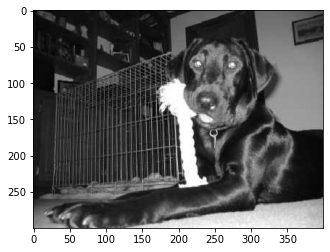

In [7]:
plt.imshow(one['image'])

In [8]:
one['image'].numpy()

array([[[ 13,  13,  13],
        [ 17,  17,  17],
        [ 20,  20,  20],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 15,  15,  15],
        [ 18,  18,  18],
        [ 20,  20,  20],
        ...,
        [ 75,  75,  75],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 16,  16,  16],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [ 72,  72,  72],
        [ 68,  68,  68],
        [ 66,  66,  66]],

       ...,

       [[133, 133, 133],
        [134, 134, 134],
        [137, 137, 137],
        ...,
        [194, 194, 194],
        [192, 192, 192],
        [193, 193, 193]],

       [[136, 136, 136],
        [138, 138, 138],
        [141, 141, 141],
        ...,
        [191, 191, 191],
        [190, 190, 190],
        [191, 191, 191]],

       [[135, 135, 135],
        [138, 138, 138],
        [142, 142, 142],
        ...,
        [189, 189, 189],
        [188, 188, 188],
        [189, 189, 189]]

In [9]:
one['label']

<tf.Tensor: shape=(), dtype=int64, numpy=1>

0 = cat

1 = dog

In [10]:
im = Image.fromarray(one['image'].numpy())

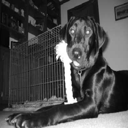

In [11]:
im.resize((128, 128), Image.BICUBIC)

# Preprocesing dataset

- Take 10000 as sample
- Resize to 64x64
- RGB intensity is (0-255), so make it (0-1)
- Convert both images and labes to numpy arrays, as TF can work only with np arrays or tensors, but not python lists

In [26]:
# Take 10000

samples = [x for _, x in zip(range(10000), ds['train'])]

len(samples)

10000

In [27]:
images = []
labels = []

for sample in samples:
    image_as_array = sample['image'].numpy()
    im = Image.fromarray(image_as_array)
    resized = im.resize((64, 64), Image.BICUBIC)
    resize_as_array = np.asarray(resized)
    images.append(resize_as_array)
    
    labels.append(sample['label'])


In [28]:
images[0]

array([[[216, 220, 218],
        [116, 115, 109],
        [ 90,  84,  75],
        ...,
        [183, 180, 132],
        [208, 199, 156],
        [194, 181, 135]],

       [[151, 152, 148],
        [ 87,  87,  82],
        [ 85,  86,  82],
        ...,
        [177, 176, 127],
        [179, 178, 131],
        [178, 175, 127]],

       [[ 98,  95,  88],
        [ 81,  84,  81],
        [ 81,  91,  93],
        ...,
        [187, 182, 134],
        [171, 173, 124],
        [160, 163, 115]],

       ...,

       [[141, 147, 105],
        [113, 119,  75],
        [146, 154, 105],
        ...,
        [ 90, 115,  81],
        [ 95, 110,  93],
        [ 48,  63,  55]],

       [[159, 160, 111],
        [157, 161, 112],
        [168, 173, 131],
        ...,
        [107, 128,  85],
        [127, 137, 110],
        [127, 131, 106]],

       [[156, 152, 101],
        [154, 161, 107],
        [137, 142,  99],
        ...,
        [ 80, 101,  66],
        [ 69,  86,  60],
        [101, 107,  79]]

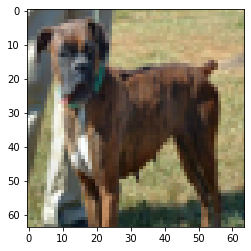

In [29]:
plt.imshow(images[0])

In [30]:
labels[0]

<tf.Tensor: shape=(), dtype=int64, numpy=1>

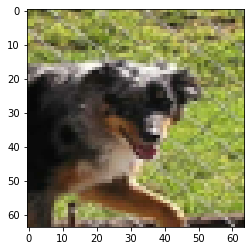

In [31]:
plt.imshow(images[2])

In [32]:
labels[2]

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [33]:
images = np.array(images)

In [34]:
images = images/255.0

In [35]:
images[0]

array([[[0.84705882, 0.8627451 , 0.85490196],
        [0.45490196, 0.45098039, 0.42745098],
        [0.35294118, 0.32941176, 0.29411765],
        ...,
        [0.71764706, 0.70588235, 0.51764706],
        [0.81568627, 0.78039216, 0.61176471],
        [0.76078431, 0.70980392, 0.52941176]],

       [[0.59215686, 0.59607843, 0.58039216],
        [0.34117647, 0.34117647, 0.32156863],
        [0.33333333, 0.3372549 , 0.32156863],
        ...,
        [0.69411765, 0.69019608, 0.49803922],
        [0.70196078, 0.69803922, 0.51372549],
        [0.69803922, 0.68627451, 0.49803922]],

       [[0.38431373, 0.37254902, 0.34509804],
        [0.31764706, 0.32941176, 0.31764706],
        [0.31764706, 0.35686275, 0.36470588],
        ...,
        [0.73333333, 0.71372549, 0.5254902 ],
        [0.67058824, 0.67843137, 0.48627451],
        [0.62745098, 0.63921569, 0.45098039]],

       ...,

       [[0.55294118, 0.57647059, 0.41176471],
        [0.44313725, 0.46666667, 0.29411765],
        [0.57254902, 0

In [36]:
labels = np.array(labels)

In [37]:
images.shape

(10000, 64, 64, 3)

In [38]:
X_train = images[:8000]
y_train = labels[:8000]
X_test = images[8000:]
y_test = labels[8000:]

# Basic Neural Network


One image is 64x64x3 = 

Layers:
- Preprocesing: Flatten 64x64x3 -> 12288
- Deep layers ... 
- Final layer: 1 neuron (0 = cat, 1 = dog)



In [23]:
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=[64, 64, 3]),
        layers.Dense(100, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1228900   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,229,001
Trainable params: 1,229,001
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss="binary_crossentropy", metrics=['accuracy'])

In [47]:
log = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
250/250 [==============================] - 1s 3ms/step - loss: 2.0542 - accuracy: 0.5060 - val_loss: 0.7598 - val_accuracy: 0.5290
Epoch 2/25
250/250 [==============================] - 1s 2ms/step - loss: 0.9408 - accuracy: 0.5224 - val_loss: 0.6776 - val_accuracy: 0.5685
Epoch 3/25
250/250 [==============================] - 1s 2ms/step - loss: 0.7326 - accuracy: 0.5441 - val_loss: 0.7165 - val_accuracy: 0.5150
Epoch 4/25
250/250 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5586 - val_loss: 0.6749 - val_accuracy: 0.5810
Epoch 5/25
250/250 [==============================] - 1s 2ms/step - loss: 0.6838 - accuracy: 0.5765 - val_loss: 0.6803 - val_accuracy: 0.5610
Epoch 6/25
250/250 [==============================] - 1s 2ms/step - loss: 0.6723 - accuracy: 0.5855 - val_loss: 0.6818 - val_accuracy: 0.5615
Epoch 7/25
250/250 [==============================] - 1s 2ms/step - loss: 0.6619 - accuracy: 0.5991 - val_loss: 0.6838 - val_accuracy: 0.5620
Epoch 

In [48]:
log.history

{'loss': [2.0541861057281494,
  0.9408044219017029,
  0.732639729976654,
  0.6939092874526978,
  0.683777391910553,
  0.672321081161499,
  0.6619065403938293,
  0.6555440425872803,
  0.6510684490203857,
  0.6501279473304749,
  0.6462700963020325,
  0.6376190185546875,
  0.6363366842269897,
  0.6325691938400269,
  0.6280003190040588,
  0.6295016407966614,
  0.6249427199363708,
  0.6203727126121521,
  0.6183170676231384,
  0.6145734190940857,
  0.6147411465644836,
  0.6114617586135864,
  0.6097289323806763,
  0.6077224612236023,
  0.6059792041778564],
 'accuracy': [0.5059999823570251,
  0.5223749876022339,
  0.5441250205039978,
  0.5586249828338623,
  0.5764999985694885,
  0.5855000019073486,
  0.5991250276565552,
  0.6119999885559082,
  0.6228749752044678,
  0.6215000152587891,
  0.6236249804496765,
  0.6278749704360962,
  0.6332499980926514,
  0.6348749995231628,
  0.6413750052452087,
  0.6399999856948853,
  0.6417499780654907,
  0.6503750085830688,
  0.6502500176429749,
  0.6592500209

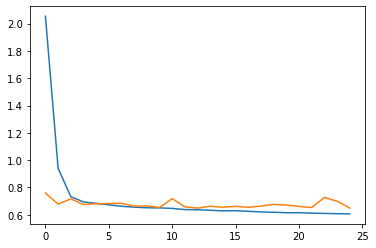

In [50]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])

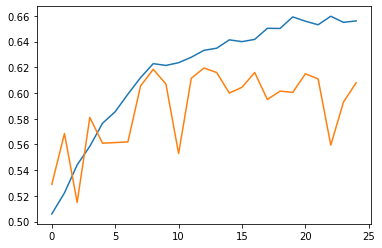

In [53]:
plt.plot(log.history['accuracy']) #blue
plt.plot(log.history['val_accuracy'])

## Deeeeeper

In [63]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=[64, 64, 3]),
        layers.Dense(1000, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              12289000  
_________________________________________________________________
dense_25 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 101       
Total params: 12,409,401
Trainable params: 12,409,401
Non-trainable params: 0
__________________________________________

In [64]:
model.compile(loss="binary_crossentropy", metrics=['accuracy'])
log = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/50
  1/250 [..............................] - ETA: 1s - loss: 0.7027 - accuracy: 0.4375WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0021s vs `on_train_batch_end` time: 0.0041s). Check your callbacks.


250/250 [==============================] - 2s 7ms/step - loss: 1.0454 - accuracy: 0.5069 - val_loss: 0.7008 - val_accuracy: 0.4705
Epoch 2/50
250/250 [==============================] - 2s 7ms/step - loss: 0.7004 - accuracy: 0.5259 - val_loss: 0.6973 - val_accuracy: 0.4940
Epoch 3/50
250/250 [==============================] - 2s 7ms/step - loss: 0.6828 - accuracy: 0.5621 - val_loss: 0.6772 - val_accuracy: 0.5780
Epoch 4/50
250/250 [==============================] - 2s 7ms/step - loss: 0.6711 - accuracy: 0.5806 - val_loss: 0.6909 - val_accuracy: 0.6145
Epoch 5/50
250/250 [==============================] - 2s 7ms/step - loss: 0.6657 - accuracy: 0.6015 - val_loss: 0.7429 - val_accuracy: 0.5660
Epoch 6/50
250/250 [==============================] - 2s 7ms/step - loss: 0.6644 - accuracy: 0.6065 - val_loss: 0.6576 - val_accuracy: 0.6050
Epoch 7/50
250/250 [==============================] - 2s 7ms/step - loss: 0.6576 - accuracy: 0.6134 - val_loss: 0.6864 - val_accuracy: 0.5760
Epoch 8/50
250/25

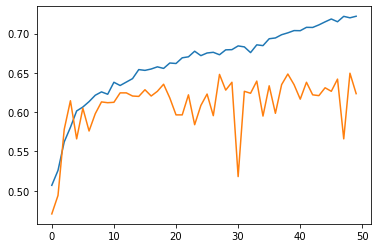

In [65]:
plt.plot(log.history['accuracy']) #blue
plt.plot(log.history['val_accuracy'])

# Deeper + dropout

In [66]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=[64, 64, 3]),
        layers.Dense(1000, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(100, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(100, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 1000)              12289000  
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)              

In [67]:
model.compile(loss="binary_crossentropy", metrics=['accuracy'])
log = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
  1/250 [..............................] - ETA: 1s - loss: 0.7690 - accuracy: 0.3750WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0046s). Check your callbacks.


250/250 [==============================] - 2s 7ms/step - loss: 0.9831 - accuracy: 0.4936 - val_loss: 0.6929 - val_accuracy: 0.5120
Epoch 2/50
250/250 [==============================] - 2s 7ms/step - loss: 0.7149 - accuracy: 0.5092 - val_loss: 0.6933 - val_accuracy: 0.4850
Epoch 3/50
250/250 [==============================] - 2s 7ms/step - loss: 0.7071 - accuracy: 0.4983 - val_loss: 0.6930 - val_accuracy: 0.5150
Epoch 4/50
250/250 [==============================] - 2s 7ms/step - loss: 0.7005 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4875
Epoch 5/50
250/250 [==============================] - 2s 7ms/step - loss: 0.6980 - accuracy: 0.5015 - val_loss: 0.6933 - val_accuracy: 0.4875
Epoch 6/50
250/250 [==============================] - 2s 7ms/step - loss: 0.6971 - accuracy: 0.5030 - val_loss: 0.6921 - val_accuracy: 0.4870
Epoch 7/50
250/250 [==============================] - 2s 7ms/step - loss: 0.6910 - accuracy: 0.5297 - val_loss: 0.6882 - val_accuracy: 0.5445
Epoch 8/50
250/25

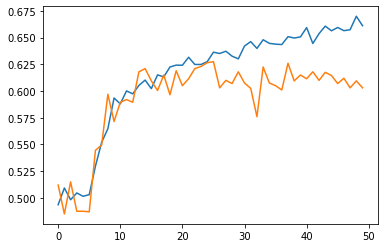

In [68]:
plt.plot(log.history['accuracy']) #blue
plt.plot(log.history['val_accuracy'])

# Cooonvolutional FTW!

In [69]:
model = keras.Sequential(
    [
        layers.Input(shape=[64, 64, 3]),
        layers.Conv2D(filters=32, kernel_size=3 , activation='relu'),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
flatten_8 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               12300900  
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 101       
Total params: 12,301,897
Trainable params: 12,301,897
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss="binary_crossentropy", metrics=['accuracy'])
log = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/50
  1/250 [..............................] - ETA: 0s - loss: 0.7189 - accuracy: 0.4375WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0034s vs `on_train_batch_end` time: 0.0058s). Check your callbacks.


250/250 [==============================] - 2s 9ms/step - loss: 0.8671 - accuracy: 0.6340 - val_loss: 0.5875 - val_accuracy: 0.6805
Epoch 2/50
250/250 [==============================] - 2s 9ms/step - loss: 0.5093 - accuracy: 0.7595 - val_loss: 0.6060 - val_accuracy: 0.6815
Epoch 3/50
250/250 [==============================] - 2s 8ms/step - loss: 0.3848 - accuracy: 0.8279 - val_loss: 0.6747 - val_accuracy: 0.6835
Epoch 4/50
250/250 [==============================] - 2s 8ms/step - loss: 0.2787 - accuracy: 0.8834 - val_loss: 0.7304 - val_accuracy: 0.6745
Epoch 5/50
250/250 [==============================] - 2s 8ms/step - loss: 0.1756 - accuracy: 0.9327 - val_loss: 0.9443 - val_accuracy: 0.6790
Epoch 6/50
250/250 [==============================] - 2s 9ms/step - loss: 0.1081 - accuracy: 0.9622 - val_loss: 1.1073 - val_accuracy: 0.6695
Epoch 7/50
250/250 [==============================] - 2s 8ms/step - loss: 0.0621 - accuracy: 0.9806 - val_loss: 1.2684 - val_accuracy: 0.6820
Epoch 8/50
250/25

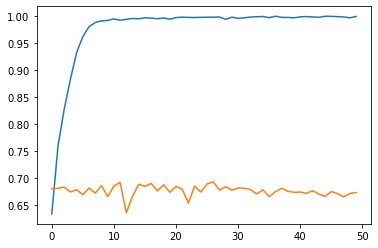

In [71]:
plt.plot(log.history['accuracy']) #blue
plt.plot(log.history['val_accuracy'])

In [77]:
model = keras.Sequential(
    [
        layers.Input(shape=[64, 64, 3]),
        layers.Conv2D(filters=128, kernel_size=3 , activation='relu'),
        layers.Conv2D(filters=96, kernel_size=3 , activation='relu', strides=2),
        layers.Conv2D(filters=64, kernel_size=3 , activation='relu', strides=2),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 128)       3584      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 96)        110688    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        55360     
_________________________________________________________________
flatten_12 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               1254500   
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 101       
Total params: 1,424,233
Trainable params: 1,424,233
Non-trainable params: 0
___________________________________________

In [78]:
model.compile(loss="binary_crossentropy", metrics=['accuracy'])
log = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
  1/250 [..............................] - ETA: 0s - loss: 0.6907 - accuracy: 0.5312WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0022s vs `on_train_batch_end` time: 0.0106s). Check your callbacks.


250/250 [==============================] - 3s 13ms/step - loss: 0.6892 - accuracy: 0.5717 - val_loss: 0.6660 - val_accuracy: 0.5885
Epoch 2/30
250/250 [==============================] - 3s 13ms/step - loss: 0.6258 - accuracy: 0.6654 - val_loss: 0.5998 - val_accuracy: 0.6680
Epoch 3/30
250/250 [==============================] - 3s 13ms/step - loss: 0.5694 - accuracy: 0.7128 - val_loss: 0.5788 - val_accuracy: 0.6845
Epoch 4/30
250/250 [==============================] - 3s 13ms/step - loss: 0.5098 - accuracy: 0.7504 - val_loss: 0.5826 - val_accuracy: 0.6825
Epoch 5/30
250/250 [==============================] - 3s 13ms/step - loss: 0.4398 - accuracy: 0.7946 - val_loss: 0.6224 - val_accuracy: 0.6885
Epoch 6/30
250/250 [==============================] - 3s 13ms/step - loss: 0.3540 - accuracy: 0.8415 - val_loss: 0.6541 - val_accuracy: 0.7180
Epoch 7/30
250/250 [==============================] - 3s 13ms/step - loss: 0.2574 - accuracy: 0.8924 - val_loss: 0.7788 - val_accuracy: 0.7440
Epoch 8/30

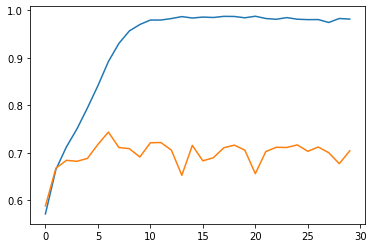

In [79]:
plt.plot(log.history['accuracy']) #blue
plt.plot(log.history['val_accuracy'])